**K-Means**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


In [ ]:
data['Genre'] = data['Genre'].map({'Male':0,'Female':1})


In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
x = data[['Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(2,11):
  km = KMeans(n_clusters=i, n_init=10)
  km.fit(x)
  css =km.inertia_ #wcss score WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.
  wcss.append(css)

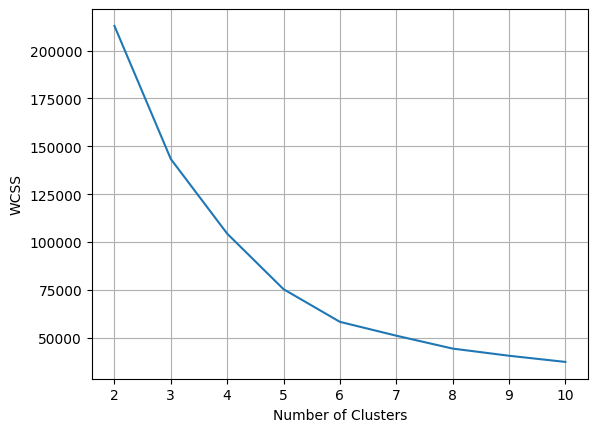

In [ ]:
plt.plot(range(2,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()

In [ ]:
km = KMeans(n_clusters=5, n_init=10)
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [ ]:
cluster_labels = km.predict(x)

In [ ]:
cluster_labels

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

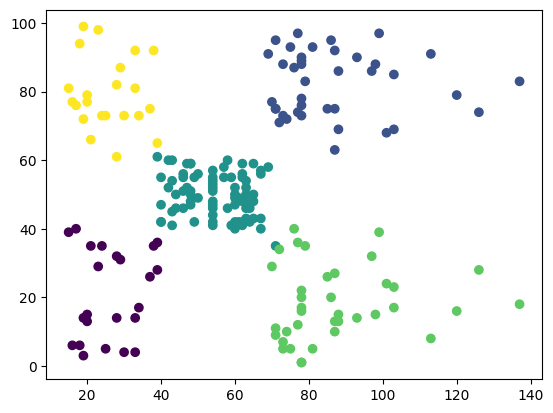

In [ ]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=cluster_labels)
plt.show()

In [ ]:
sillhouette_score = silhouette_score(x,cluster_labels)
print(sillhouette_score)

0.44424291275274114


**Agglomerative**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg_hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

In [ ]:
y_hc = agg_hc.fit_predict(x)

In [ ]:
from sklearn.metrics import silhouette_score
sillhouette_score = silhouette_score(x,y_hc)
print(sillhouette_score)

0.43997527212476695


**DBSCAN**